In [92]:
# Import libraries
from pandas import read_csv
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [93]:
series = pd.read_excel("CocaCola_Sales_Rawdata.xlsx",sheet_name='Sheet1')
series =pd.DataFrame(series);

In [94]:
def func(str):
    timestamp=''
    quarterStr = str[:2]
    yearStr= str[3:]
    if(quarterStr=='Q1'):
        timestamp='19'+yearStr+'-01-01';
    if(quarterStr=='Q2'):
        timestamp='19'+yearStr+'-03-01';
    if(quarterStr=='Q3'):
        timestamp='19'+yearStr+'-06-01';
    if(quarterStr=='Q4'):
        timestamp='19'+yearStr+'-09-01';
    pd.to_datetime(timestamp)
    return timestamp

In [95]:
series["Date"]=series["Quarter"].apply(func)
series
newSeries=series[["Date","Sales"]]
newSeries['Date']= pd.to_datetime(newSeries['Date'])
newSeries.dtypes

Date     datetime64[ns]
Sales           float64
dtype: object

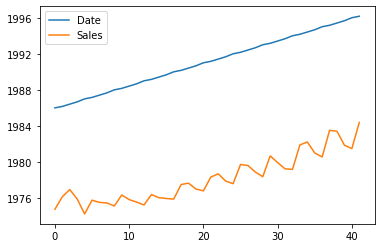

In [96]:
from pandas import read_csv
from matplotlib import pyplot
newSeries.plot()
pyplot.show()

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

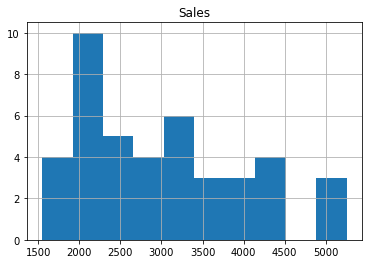

In [97]:
newSeries.hist()

In [98]:
# separate out a validation dataset
split_point = len(newSeries) - 10
dataset, validation = newSeries[0:split_point], newSeries[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 32, Validation 10


In [99]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=1, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]


In [100]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 274.012


In [101]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [102]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [103]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
#p_values = range(0, 5)
#d_values = range(0, 5)
#q_values = range(0, 5)
warnings.filterwarnings("ignore")
#evaluate_models(train.values, p_values, d_values, q_values)

In [104]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [105]:
# load data
train = read_csv('dataset.csv', header=0, index_col=1, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')
X=X[:,1:2]
X

array([[2244.961 ],
       [2533.805 ],
       [2154.963 ],
       [1547.819 ],
       [2104.412 ],
       [2014.363 ],
       [1991.747 ],
       [1869.05  ],
       [2313.632 ],
       [2128.32  ],
       [2026.829 ],
       [1910.604 ],
       [2331.165 ],
       [2206.55  ],
       [2173.968 ],
       [2148.278 ],
       [2739.308 ],
       [2792.754 ],
       [2556.01  ],
       [2480.9739],
       [3039.523 ],
       [3172.116 ],
       [2879.001 ],
       [2772.    ],
       [3550.    ],
       [3508.    ],
       [3243.86  ],
       [3056.    ],
       [3899.    ],
       [3629.    ],
       [3373.    ]], dtype=float32)

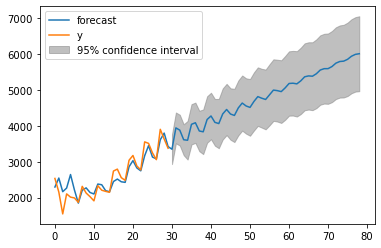

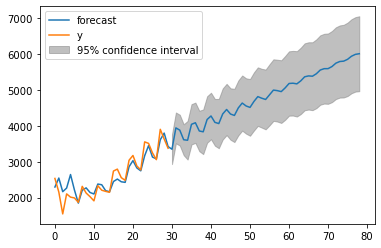

In [113]:
# fit model
model = ARIMA(X[:,1:], order=(3,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 79)

In [114]:
#Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[2], forecast))
rmse

611.5069726166129

In [115]:
# fit model
data = pd.read_excel("CocaCola_Sales_Rawdata.xlsx",sheet_name='Sheet1')
data =pd.DataFrame(series);
# prepare data
X = train.values
X = X.astype('float32')

In [116]:
model = ARIMA(X[:,1:], order=(3,1,0))
model_fit = model.fit()

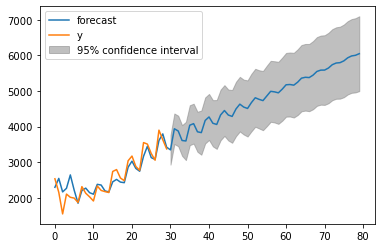

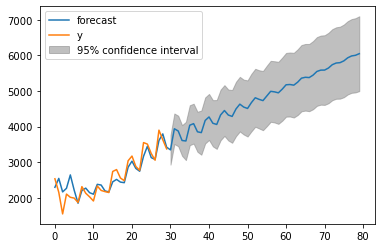

In [117]:
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1,80)

In [118]:
forecast

array([3345.57253774, 3938.3001297 , 3875.95568056, 3608.81464732,
       3595.18363991, 4038.08314142, 4081.732697  , 3852.74210033,
       3829.95057275, 4171.48402453])